In [ ]:
from arcgis import GIS
from arcgis.features import FeatureLayer

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
gis = GIS()

In [ ]:
url = 'https://services3.arcgis.com/oZfKvdlWHN1MwS48/arcgis/rest/services/MachineLearningSeagrass/FeatureServer/1'
df = FeatureLayer(url).query().df
df.head(2)

,CID,Join_Count,NameEMU,OBJECTID,Present,TARGET_FID,appO2,depth,dissO2,nitrate,percO2,phosphate,salinity,silicate,temp,SHAPE
0,10,1,"Epipelagic, Warm to Very Warm, Euhaline, Oxic,...",1,0,1,-0.097869,0,5.038187,0.503541,102.16810,0.070516,35.69495,3.878356,24.75329,"{'y': 3070014.173990999, 'spatialReference': {..."
1,10,1,"Epipelagic, Warm to Very Warm, Euhaline, Oxic,...",2,0,2,0.051061,0,4.710738,0.836354,99.08915,0.124987,35.98500,1.521608,24.13740,"{'y': 3463385.7571735503, 'spatialReference': ..."


In [ ]:
df.shape

(100000, 16)

In [ ]:
data = df[['salinity', 'temp', 'phosphate','nitrate', 'silicate', 'dissO2']]
data.head()

,salinity,temp,phosphate,nitrate,silicate,dissO2
0,35.69495,24.75329,0.070516,0.503541,3.878356,5.038187
1,35.98500,24.13740,0.124987,0.836354,1.521608,4.710738
2,35.58104,18.00565,1.032444,15.172270,10.742860,3.839985
3,35.46936,14.55408,0.936634,14.109170,9.925514,3.654587
4,35.41380,13.48950,0.980522,14.746720,10.737210,3.721700


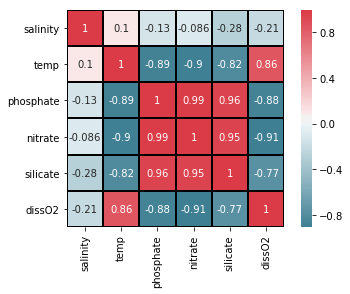

In [ ]:
sns.heatmap(data.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, annot = True, linecolor = 'k', linewidths = 1)
plt.show()

In [ ]:
categories = pd.get_dummies(df['NameEMU'])
categories.columns = ['c1', 'c2', 'c3']

In [ ]:
X = data.join(categories)
y = df['Present']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
rfco = RandomForestClassifier(n_estimators=500, oob_score=True)

In [ ]:
rfco.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

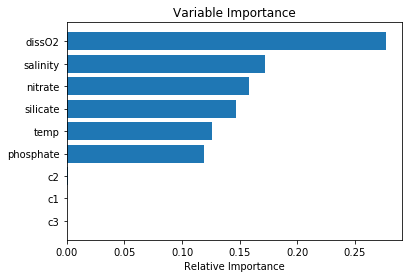

In [ ]:
import numpy as np

predict_vars = list(X_train.columns)
pos = np.arange(len(predict_vars)) + .5
# Sort Variables wrt. to Their Importance
imp_sorted = np.argsort(rfco.feature_importances_)
# New List of Sorted Variable Names
sorted_vars = [predict_vars[i] for i in imp_sorted]

# Plot Variable Importances
plt.barh(pos, rfco.feature_importances_[imp_sorted], align='center')
plt.yticks(pos, sorted_vars)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
y_test_pred = rfco.predict(X_test)
print('Accuracy = ' + str(metrics.accuracy_score(y_test, y_test_pred)))

# Print Accuracy Metrics
print('Locations with Seagrass = ' + str(len(np.where(y_test==1)[0])) )
print('Predicted Locations with Seagrass = ' + str(len(np.where(y_test_pred==1)[0])))

Accuracy = 0.9469666666666666
Locations with Seagrass = 9345
Predicted Locations with Seagrass = 9216
